In [1]:
!ls

P_DPQ.XPT
P_DPQ.csv
t-sne_health_and_nutrition_example.ipynb


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("P_DPQ.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    8965 non-null   float64
 1   DPQ010  8308 non-null   float64
 2   DPQ020  8306 non-null   float64
 3   DPQ030  8306 non-null   float64
 4   DPQ040  8305 non-null   float64
 5   DPQ050  8305 non-null   float64
 6   DPQ060  8304 non-null   float64
 7   DPQ070  8304 non-null   float64
 8   DPQ080  8304 non-null   float64
 9   DPQ090  8302 non-null   float64
 10  DPQ100  5540 non-null   float64
dtypes: float64(11)
memory usage: 770.6 KB


In [5]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#perform PCA without CAS connection
from sklearn import datasets, decomposition
#fill missing values
X = data.fillna(data.mean())
n_samples = X.shape[0]

In [6]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X.shape

(8965, 11)

In [7]:
#https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca
# We center the data and compute the sample covariance matrix
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

20257176.185754195
20259436.022454947
2.4232782337160614
2.423548568191051
0.5656233879521505
0.5656864873930207


In [8]:
#create pandas dataframes from label and pca transformed data
X_transform = pca.transform(X)
transform_df = pd.DataFrame(X_transform,columns=['score0','score1','score2'])

In [9]:
X_transform.shape

(8965, 3)

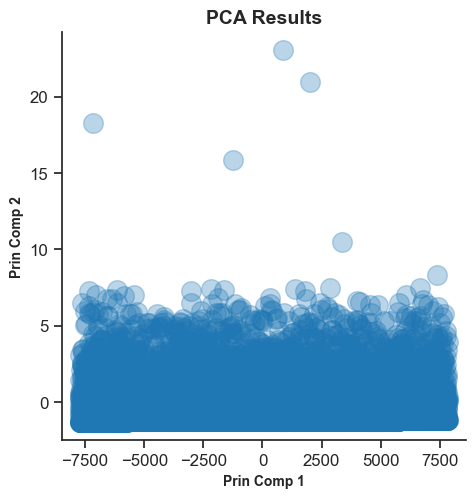

In [10]:
# Plot of PCA

# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='score0',
           y='score1',
           data=transform_df,
           fit_reg=False,
           legend=True,
           #size=9,
           #hue='score2',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [13]:
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8965 samples in 0.008s...
[t-SNE] Computed neighbors for 8965 samples in 0.094s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8965
[t-SNE] Computed conditional probabilities for sample 2000 / 8965
[t-SNE] Computed conditional probabilities for sample 3000 / 8965
[t-SNE] Computed conditional probabilities for sample 4000 / 8965
[t-SNE] Computed conditional probabilities for sample 5000 / 8965
[t-SNE] Computed conditional probabilities for sample 6000 / 8965
[t-SNE] Computed conditional probabilities for sample 7000 / 8965
[t-SNE] Computed conditional probabilities for sample 8000 / 8965
[t-SNE] Computed conditional probabilities for sample 8965 / 8965
[t-SNE] Mean sigma: 23.897299
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.234207
[t-SNE] KL divergence after 300 iterations: 1.680636


In [14]:
tsne_df = pd.DataFrame(columns=['tsne-2d-one','tsne-2d-two'])
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]

In [15]:
tsne_df.head()

,tsne-2d-one,tsne-2d-two
0,17.443897,-4.409247
1,17.443771,-4.405210
2,17.443716,-4.403487
3,17.443686,-4.402228
4,17.443396,-4.392488


/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_6293/1167394705.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot = sns.scatterplot(


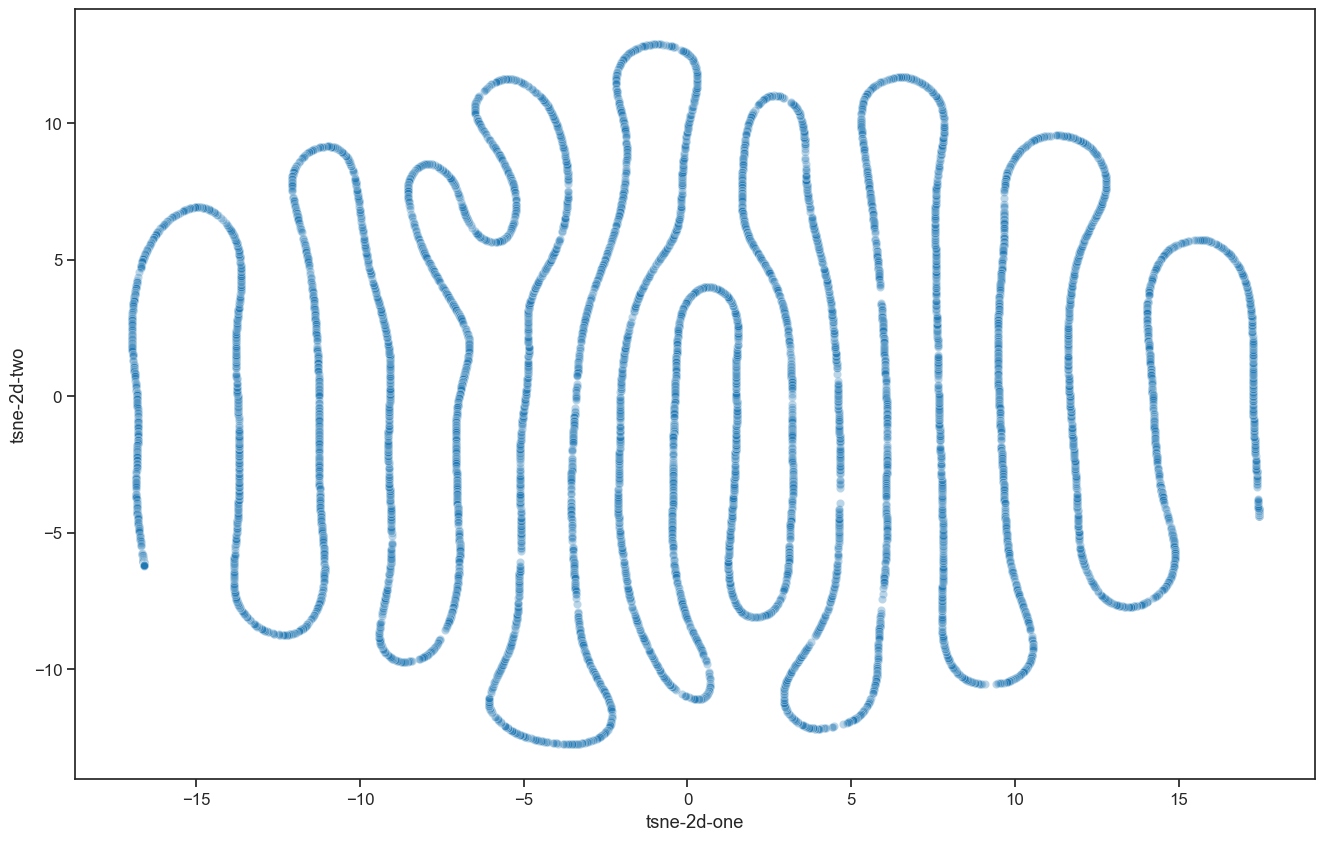

In [17]:
#plot the t-SNE results
plt.figure(figsize=(16,10))
plot = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=tsne_df,
    legend="full",
    alpha=0.3
)

In [18]:
fig = plot.get_figure()
fig.savefig("tsne_plot_mental-health-screener.png")